In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = tf.cast(x_train, tf.float32), tf.cast(x_test, tf.float32)

print("x_train.shape :",x_train.shape)
print("x_test.shape :",x_test.shape)
print("y_train.shape :",y_train.shape)
print("y_test.shape :",y_test.shape)

x_train.shape : (60000, 28, 28)
x_test.shape : (10000, 28, 28)
y_train.shape : (60000,)
y_test.shape : (10000,)


In [5]:
num_classes = 10
num_features = x_train.shape[1] * x_train.shape[2] # 28*28 = 784

x_train, x_test = tf.reshape(x_train, [-1, num_features]), tf.reshape(x_test, [-1, num_features])
x_train, x_test = x_train/255., x_test/255.

In [ ]:
# #만약에 tensorflow.keras.Model 혹은 tensorflow.keras.layers를 사용하지 않고 직접 Neural Network를 코딩해야한다면

# W1=tf.Variable(tf.random_normal_initializer(stddev=1)([num_features, 128])),
# W2=tf.Variable(tf.random_normal_initializer(stddev=1)([128, 256])),
# W3=tf.Variable(tf.random_normal_initializer(stddev=1)([256, num_classes]))
# b1=tf.Variable(tf.zeros([128])),
# b2=tf.Variable(tf.zeros([256])),
# b3=tf.Variable(tf.zeros([num_classes]))

# def neural_net(x):
#     layer_1 = tf.matmul(x, W1) + b1
#     layer_1 = tf.nn.relu(layer_1)
    
#     layer_2 = tf.matmul(layer_1, W2) + b2
#     layer_2 = tf.nn.relu(layer_2)
    
#     out_layer = tf.matmul(layer_2, W3) + b3
#     return tf.nn.softmax(out_layer)

In [34]:
class Stuff(object): 
    def __init__(self, x, y, range): # 생성자
        super(Stuff, self).__init__() 
        self.x = x 
        self.y = y 
        self.range = range 
    
    def __call__(self, x, y): # 생성자에서 생성된 객체의 내부 상태를 변경
        self.x = x 
        self.y = y 
        print('__call__ with (%d,%d)' % (self.x, self.y) )
        
    def __del__(self): # 종료자
        del self.x 
        del self.y 
        del self.range
        
s = Stuff(1, 2, 3)
s.x

s(7, 8)
s.x

__call__ with (7,8)


7

In [5]:
from tensorflow.keras import Model, layers

# Dense = MLP , Fully Connected Layer
# 마지막 Layer에는 Activation(relu) 사용안함
# Model이라는 부모 Class를 상속

class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        #super().__init__()
        self.fc1 = layers.Dense(128, activation=tf.nn.relu)
        self.fc2 = layers.Dense(256, activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)
        
    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x
    
neural_net = NeuralNet()

In [6]:
def cross_entropy_loss(x,y):
    y = tf.cast(y, tf.int64)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = x)
    return tf.reduce_mean(loss)

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    #return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis = -1) # shape가 (10000,) 이므로 axis=0 or -1이 되고 차원이 reduce되어 답이 scalar로 반환 -> 안써도됨
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
lr = 0.003
optimizer = tf.optimizers.SGD(lr)

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy_loss(pred, y)
    
    trainable_variables = neural_net.trainable_variables
    gradients = g.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [8]:
batch_size = 200
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(60000).batch(batch_size).prefetch(1)

epoch = 76
display_epoch = 4

for epo in range(1, epoch+1):
    for step, (batch_x, batch_y) in enumerate(train_data, 1): # step을 1부터 시작
        run_optimization(batch_x, batch_y)
        
    if epo % display_epoch == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("epoch:", epo, ", loss:", loss.numpy(), ", acc:", acc.numpy())

epoch: 4 , loss: 2.28206 , acc: 0.265
epoch: 8 , loss: 2.2191913 , acc: 0.325
epoch: 12 , loss: 2.1288977 , acc: 0.445
epoch: 16 , loss: 2.0065382 , acc: 0.47
epoch: 20 , loss: 1.8866614 , acc: 0.705
epoch: 24 , loss: 1.8555423 , acc: 0.715
epoch: 28 , loss: 1.7751985 , acc: 0.785
epoch: 32 , loss: 1.7416252 , acc: 0.77
epoch: 36 , loss: 1.6857797 , acc: 0.83
epoch: 40 , loss: 1.6848527 , acc: 0.805
epoch: 44 , loss: 1.7242748 , acc: 0.775
epoch: 48 , loss: 1.6634101 , acc: 0.835
epoch: 52 , loss: 1.6969917 , acc: 0.795
epoch: 56 , loss: 1.6873679 , acc: 0.81
epoch: 60 , loss: 1.6850644 , acc: 0.81
epoch: 64 , loss: 1.6650805 , acc: 0.82
epoch: 68 , loss: 1.6894977 , acc: 0.79
epoch: 72 , loss: 1.6500134 , acc: 0.84
epoch: 76 , loss: 1.6623341 , acc: 0.825


In [12]:
pred = neural_net(x_test)
acc = accuracy(pred, y_test)
print("Test Accuracy:", acc.numpy())

Test Accuracy: 0.8231


In [10]:
print(neural_net.trainable_variables)

[<tf.Variable 'neural_net/dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
array([[ 0.00163957, -0.00916036, -0.01483789, ..., -0.06764756,
         0.00836556,  0.02472448],
       [-0.07820528, -0.01578622,  0.01433871, ...,  0.02082299,
        -0.04306871,  0.04295968],
       [-0.06081338, -0.0776992 ,  0.07880222, ...,  0.05263605,
         0.01229152, -0.06723958],
       ...,
       [ 0.03757196,  0.07950643, -0.04269119, ..., -0.07205522,
         0.07473961, -0.00519916],
       [ 0.04516595, -0.01238912,  0.01411404, ..., -0.01427062,
         0.01570316, -0.03460593],
       [-0.00695947, -0.0662726 , -0.04842587, ..., -0.03540497,
         0.05907767,  0.01853534]], dtype=float32)>, <tf.Variable 'neural_net/dense/bias:0' shape=(128,) dtype=float32, numpy=
array([ 0.01103049,  0.02521615,  0.02652198,  0.00611912,  0.05034804,
        0.02908815,  0.0306187 ,  0.04735538,  0.03281553,  0.01421567,
        0.01439548,  0.04376185,  0.01560764,  0.00516667,  0.03149023,

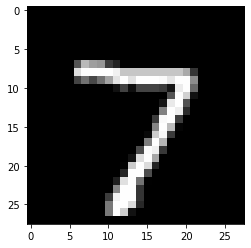

Model prediction: 7


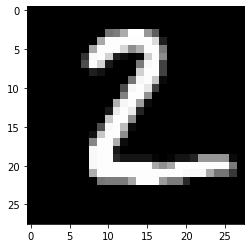

Model prediction: 2


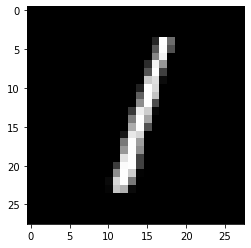

Model prediction: 1


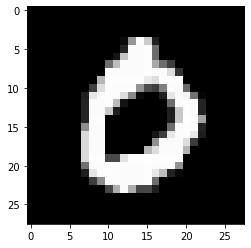

Model prediction: 0


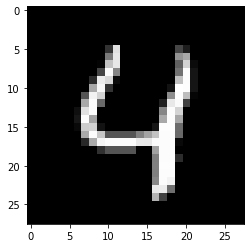

Model prediction: 4


In [13]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images] # x_test[0, 1, 2, 3, 4]
predictions = neural_net(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))